In [23]:
a = 'aouiedboinb'
a[-2]

'n'

In [5]:
import pandas as pd
import os
from pathlib import Path

def createDir(path):
  path = path[0:-1] #take out the last "/"
  if not os.path.isdir(f'./{path}'):
    currentPath = Path().absolute() #tentar './'
    dirPath = str(currentPath) + path
    os.makedirs(path)
  return

def takeOutNumber(string):
  try:
    withOutNumbers = string.split('. ')[1]
    return withOutNumbers
  except:
    return string

def takeOutVar(string):
  try:
    withOutVarPar1 = string.split(' ${')[0]
    withOutVarPar2 = string.split('}')[1]
    withOutVar = withOutVarPar1 + withOutVarPar2
    return withOutVar
  except:
    return string

def takeOutSideBars(string):
  try:
    string = string.replace('/', '-')
    return string
  except:
    return string

def getPathAndTitle(col):
  path = 'plots/'
  identifier = col.split(' ')[0]
  numbers = identifier.split('.')
  for number in numbers[0:-2]:
    path = path + f'{number}/'

  print(f"path: {path}")

  createDir(path)

  title = takeOutVar(col)
  title = takeOutNumber(title)
  title = takeOutSideBars(title)
  print(f"title: {title}")
  
  return path, title

def makePlot(info):
  col, sheet = info.values()

  excel = pd.ExcelFile('./ECS_2107SP_-_BOCA_DO_SAPO_-_all_versions_-_labels_-_2022-04-29-18-27-31_(anonimizado).xlsx')
  df = pd.read_excel(excel, sheet)

  path, title = getPathAndTitle(col)

  try:
    nomeCol = 'Nome completo do/a morador/a que responderá e assinará a enquete:'
    df = df[(df[nomeCol] != 'Teste app') & (df[nomeCol] != 'Teste 2') & (df[nomeCol] != 'Teste') & (df[col] != 'Nenhuma') & (df[col] != 'Nenhum') & (df[col] != 'Não sabe/Não respondeu') & (df[col] != 'Não sabe/ Não respondeu')][col].to_frame()
  except:
    df = df[(df[col] != 'Nenhuma') & (df[col] != 'Nenhum') & (df[col] != 'Não sabe/Não respondeu') & (df[col] != 'Não sabe/ Não respondeu')][col].to_frame()
  df = df[col].rename('').to_frame()
  col = ''
  plot = df.groupby([col])[col].count().plot.bar(title=title, figsize=(7,4))
  plot.figure.savefig(path+title, dpi=300, bbox_inches='tight', facecolor='white')

In [10]:
infosTeste = [
  {
    "col": "4.04. ${nome_deficiencia} tem alguma das seguintes deficiências?",
    "sheet": "deficiencia",
  },
  {
    "col": "4.03. Nos últimos 12 meses, ${nome_problemas_respiratorios} teve algum dos seguintes problemas respiratórios?",
    "sheet": "problemas_respiratorios",
  },
  { 
    "col": "4.02. ${nome_doencas_permanentes} tem alguma das seguintes doenças permanentes ou de longa duração?",
    "sheet": "doencas_permanentes",
  },
  { 
    "col": "4.01. Nos últimos 12 meses, ${nome_doencas_sameamento} teve alguma das seguintes doenças relacionadas à falta de saneamento?",
    "sheet": "doencas_saneamento",
  },
  { 
    "col": "3.08. ${nome_morador_auxgoverno} recebe algum dos seguintes auxílios financeiros fixos do governo?",
    "sheet": "auxilio_do_governo",
  },
  { 
    "col": "3.07. ${nome_morador_rendaextra} tem alguma das seguintes fontes de renda extra?",
    "sheet": "outra_fonte_de_renda",
  },
]

infos = [
  {
    "col": "4.04. ${nome_deficiencia} tem alguma das seguintes deficiências?",
    "sheet": "deficiencia",
  },
  {
    "col": "4.03. Nos últimos 12 meses, ${nome_problemas_respiratorios} teve algum dos seguintes problemas respiratórios?",
    "sheet": "problemas_respiratorios",
  },
  { 
    "col": "4.02. ${nome_doencas_permanentes} tem alguma das seguintes doenças permanentes ou de longa duração?",
    "sheet": "doencas_permanentes",
  },
  { 
    "col": "4.01. Nos últimos 12 meses, ${nome_doencas_sameamento} teve alguma das seguintes doenças relacionadas à falta de saneamento?",
    "sheet": "doencas_saneamento",
  },
  { 
    "col": "3.08. ${nome_morador_auxgoverno} recebe algum dos seguintes auxílios financeiros fixos do governo?",
    "sheet": "auxilio_do_governo",
  },
  { 
    "col": "3.07. ${nome_morador_rendaextra} tem alguma das seguintes fontes de renda extra?",
    "sheet": "outra_fonte_de_renda",
  },
  {
    "col": "3.06. ${nome_morador_previdencia} recebe algum dos seguintes benefícios previdenciários?",
    "sheet": "beneficios_previdenciarios",
  },
  {
    "col": "3.01. ${nome_empregado} exerceu alguma atividade remunerada na última semana?",
    "sheet": "esta_empregado",
  },
  { 
    "col": "2.03. Atualmente, ${nome_morador_atualmente_estuda} estuda?",
    "sheet": "atualmente_estuda_moradores",
  },
  { 
    "col": "2.02. Qual o nível educacional máximo que ${nome_morador_ate_que_serie} atingiu?",
    "sheet": "ate_que_serie_moradores",
  },
  {
    "col": "2.01. ${nome_morador_le_escreve} sabe ler e escrever?",
    "sheet": "le_escreve_moradores",
  },
  { 
    "col": "1.06. Onde nasceu ${nome_morador_origem}?",
    "sheet": "origem_moradores",
  },
  { 
    "col": "1.05. De qual raça ou cor ${nome_morador_raca} se enxerga?",
    "sheet": "raca_moradores",
  },
  { 
    "col": "1.04. Quais dos seguintes documentos ${nome_morador_documento} já tirou?",
    "sheet": "documento_moradores",
  }, #PLOTAR AS IDADES
  { 
    "col": "1.02. Qual o sexo de ${nome_morador_sexo}?",
    "sheet": "sexo_moradores",
  },
  { 
    "col": "qtd_moradores",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "4.05. Diarreia é um problema recorrente em algum membro da família?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.01. Qual é o material predominante da cobertura da casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.02. Qual é o material predominante das paredes externas da casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.03. Qual é o material predominante no piso interno da casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.04. A casa apresenta quais dos seguintes problemas?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "5.05. Algum(ns) dos moradores da residência deseja ter o seu próprio domícilio, diferente do atual?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.06. Existe alguma plantação/horta no terreno do imóvel?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.08. Quantos cômodos há na casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  }, # Realizar dormitorios/comodos
  { 
    "col": "5.09. Do total de cômodos, quantos são exclusivamente dormitórios?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "5.10. Quantas camas ou lugares de dormir são utilizados na casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.11. Quais das seguintes características o terreno em que está a casa apresenta?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  }, #expandir
  { 
    "col": "5.12. Nos últimos 12 meses, quantas vezes o terreno e/ou a casa inundou?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.13. Qual a principal razão que faz o terreno e/ou a casa inundar?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  }, #aceitar "outro"
  { 
    "col": "5.14. Em um raio de 50 metros de distância do terreno, existem quais dos seguintes itens?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  }, #expandir
  { 
    "col": "5.15. Qual é a área estimada do terreno, em metros quadrados?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "5.16. Qual é a área construída estimada, em metros quadrados?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "5.16. Quais dos seguintes materiais estão presentes no solo do terreno em que está a casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  }, #expandir
  { 
    "col": "06.01. Como foi adquirida a casa onde a família mora?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "06.02. Quanto foi pago pela casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "06.03. Quanto foi gasto, até o momento, com a construção da casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "06.04. Quanto é pago, mensalmente, pelo aluguel da casa e/ou terreno em que mora?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "06.05. Como foi adquirido o terreno da casa onde a família mora?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "06.06. Quanto foi pago pelo terreno?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "06.07. Qual a situação legal do terreno da casa onde a família mora?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  { 
    "col": "06.08. O responsável pelo lar ou seu/sua parceiro/a é proprietário/a de outra casa ou terreno?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.00. Sua família tem acesso à internet banda larga/wifi na casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.01. Sua família tem acesso à água potável para beber e cozinhar (mesmo que a água precise ser obtida fora do terreno)?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.02. De onde é obtida a água que usam na sua casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  # {
  #   "col": "De qual outro local?",
  #   "sheet": "ECS_2107SP - BOCA DO SAPO_",
  # },
  {
    "col": "07.03. Com qual frequência a água é acessada?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.04. Pensando na frequência com que a água é acessada, as necessidades da família são atendidas?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.05. Como a água é distribuída na casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.06. Como é o sistema sanitário da casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.07. Qual o destino final do esgoto do banheiro da casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Qual outro local?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.08. A casa possui energia elétrica?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Qual outra fonte?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.09. Pensando na frequência que a energia elétrica está disponível, as necessidades da família são atendidas?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.10. De que formas é descartado o lixo produzido na sua casa?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  }, #expandir
  #07.11. A preperação de alimentos na sua casa é feita a partir de: 
  #decidido não coloca por flta de respostas
  {
    "col": "08.01.01. A família já sofreu algum processo de remoção coletivo de alguma comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.02. Por que a família foi removida?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Qual outra razão?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.03. A família recebeu algum dos seguintes auxílios, após a remoção?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Qual outra forma de auxílio?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.04. Quantos anos atrás a família se mudou para esta comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.05. A família já morou em outro terreno nesta comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.06. Como era o lugar em que a família vivia antes de morar nesta comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Qual outra situação?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.07. Qual era a condição do imóvel em que a família vivia antes de morar nesta comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Qual outra condição?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.08. Qual foi o principal motivo que fez a família sair do lugar em que vivia antes de morar nesta comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Qual outro motivo?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.09. Por quanto tempo a família planeja ainda viver na comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.10. A família já sofreu algum dos seguintes tipos de discriminação ou preconceito?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },#enpandir
  {
    "col": "08.01.11. Como você acha que está a situação da sua comunidade em comparação a 2 anos atrás?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.01.12. Como você acha que estará a situação da sua comunidade daqui a 2 anos?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.02.01. Você confia nas seguintes pessoas ou instituições?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Família",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Amigos",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Vizinhos",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Líderes comunitários",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Polícia",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Prefeitura",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Políticos",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Comunidade religiosa ou igreja",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Mídia (TV, jornal, etc)",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.02.02. Como você diria que seus vizinhos ajudam sua família?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  }, #expandir
  {
    "col": "08.02.03. Qual das opções descreve melhor a sua relação com os outros moradores da comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.02.04. Existe alguma pessoa que represente os moradores da comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "Como essa pessoa se chama?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.02.05. Existe, na sua comunidade, uma associação de moradores?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.03.03. Comparando hoje com um ano atrás, como você acredita que está a disposição dos moradores da comunidade para ajudar os outros?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.03.04. No último ano, você ou algum membro da sua família participou de algum grupo, organização ou associação que trabalhe em benefício da comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.03.05. Por que não participou?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.03.06. Os membros da família participaram ou participam de quais dos seguintes tipos de grupo?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.03.06. Os membros da família participaram ou participam de quais dos seguintes tipos de grupo?/Associação de moradores da comunidade",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },#expandir
  {
    "col": "08.03.07. Quais são os canais de comunicação utilizados entre os moradores, para se informar sobre o que acontece na comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },#expandir
  {
    "col": "08.03.08. Alguém na família se disponibiliza para auxiliar na mobilização, alimentação, execução de obra ou busca de parcerias, para os projetos comunitários?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.04.01. Existem instituições ou organizações externas que realizam um trabalho permanente na comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "08.04.02. Que tipo de instituições ou organizações?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },#expandir
  {
    "col": "08.04.03. Quais os nomes das instituições que você sabe que trabalham aqui?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "09.01. Como você avalia a identificação das ruas e vielas e a numeração das casas na comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "09.02. Como você avalia a iluminação das ruas e vielas da comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "09.03. Como você avalia a acessibilidade das ruas, vielas ou escadas que dão acesso à comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "09.04. Como você avalia a pavimentação das ruas e vielas da comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "09.05. Como você avalia os espaços para recreação e lazer na comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "09.06. Como você avalia os espaços para reuniões comunitárias?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "10.01. A família gostaria de participar das reuniões que  Instituições ou ONGs promoverão com os moradores para propor projetos e soluções de melhoria para a comunidade?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "10.02. Podemos compartilhar o seu nome e o seu telefone para que Instituições ou ONGs possam entrar em contato?",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },
  {
    "col": "07.11. A preperação de alimentos na sua casa é feita a partir de:",
    "sheet": "ECS_2107SP - BOCA DO SAPO_",
  },#expandir
]

In [12]:
len(infos)

105

path: plots/4/
title: tem alguma das seguintes deficiências?
path: plots/4/
title: Nos últimos 12 meses, teve algum dos seguintes problemas respiratórios?
path: plots/4/
title: tem alguma das seguintes doenças permanentes ou de longa duração?
path: plots/4/
title: Nos últimos 12 meses, teve alguma das seguintes doenças relacionadas à falta de saneamento?
path: plots/3/
title: recebe algum dos seguintes auxílios financeiros fixos do governo?
path: plots/3/
title: tem alguma das seguintes fontes de renda extra?
path: plots/3/
title: recebe algum dos seguintes benefícios previdenciários?
path: plots/3/
title: exerceu alguma atividade remunerada na última semana?
path: plots/2/
title: Atualmente, estuda?
path: plots/2/
title: Qual o nível educacional máximo que atingiu?
path: plots/2/
title: sabe ler e escrever?
path: plots/1/
title: Onde nasceu?
path: plots/1/
title: De qual raça ou cor se enxerga?
path: plots/1/
title: Quais dos seguintes documentos já tirou?
path: plots/1/
title: Qual o

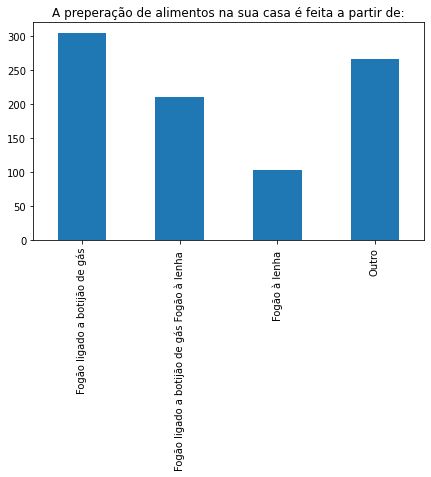

In [11]:
for info in infos:
  makePlot(info)